# Ripserer.jl

Example with the [Rispserer.jl](https://github.com/mtsch/Ripserer.jl) package. Dataset must be refactor as a vector of `Tuple`.

In [9]:
using Distances
using Plots
using Ripserer
using Random

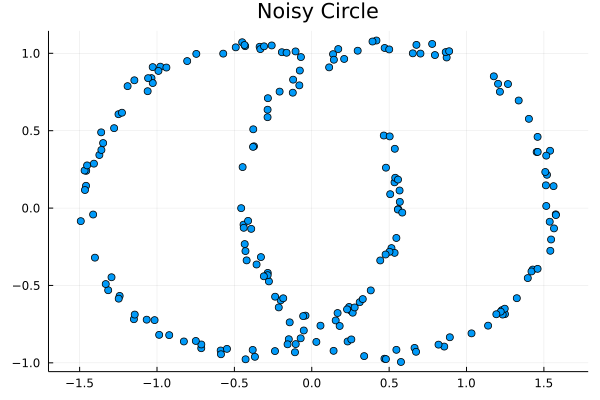

In [81]:
function noisy_circle(n; c = (0,0), r=1, noise=0.1)
    points = NTuple{2,Float64}[]
    for _ in 1:n
        θ = 2π * rand()
        push!(points, (c[1] + r * sin(θ) + noise * rand(), 
                       c[2] + r * cos(θ) + noise * rand()))
    end
    return points
end

circ_1 = noisy_circle(100, c = (-.5,0))
circ_2 = noisy_circle(100, c = (+.5,0))
data = shuffle!(vcat(circ_1,circ_2))
scatter(data; aspect_ratio=1, legend=false, title="Noisy Circle")

In [82]:
result_rips = ripserer(data, reps=true)

2-element Vector{PersistenceDiagramsBase.PersistenceDiagram}:
 200-element 0-dimensional PersistenceDiagram
 7-element 1-dimensional PersistenceDiagram

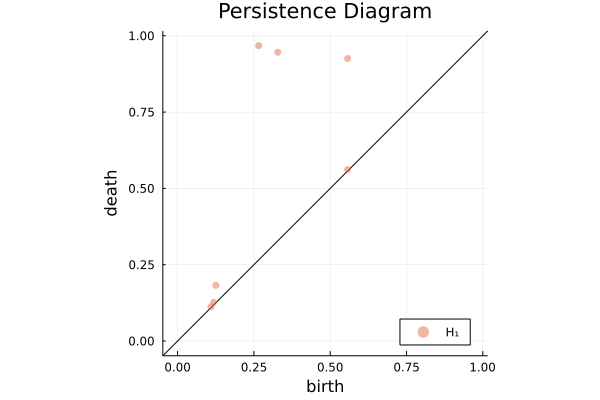

In [83]:
plot(result_rips[2])

In [84]:
circle_1 = result_rips[2][end]
circle_2 = result_rips[2][end-1]

[0.328, 0.946) with:
 birth_simplex: Simplex{1, Float64, Int64}
 death_simplex: Simplex{2, Float64, Int64}
 representative: 139-element Chain{Mod{2},Simplex{1, Float64, Int64}}

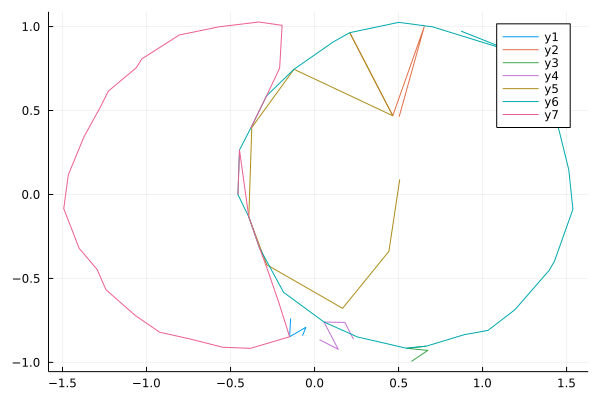

In [86]:
cycles = []
filtration = Rips(data)
p = plot()
for diagram in result_rips[2]
    v = vertices.(reconstruct_cycle(filtration, diagram))
    cycle = unique([(v...)...])
    plot!(p, data[cycle])
end
display(p)